In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/general_python2_7/bin/python


In [3]:
import Nio
import glob

In [13]:
!ls /Data2/SubX/EMC/GEFS/tas_2m//


1999  2001  2003  2005	2007  2009  2011  2013	2015
2000  2002  2004  2006	2008  2010  2012  2014	2016


In [11]:
!wgrib2  /Data2/SubX/EMC/GEFS/cape/1999/06/cape_GEFS_02jun1999_00z_d01_d35_m00.grb2

1:0:d=1999060200:CAPE:180-0 mb above ground:1 day fcst:ENS=low-res ctl
2:46954:d=1999060200:CAPE:180-0 mb above ground:2 day fcst:ENS=low-res ctl
3:92924:d=1999060200:CAPE:180-0 mb above ground:3 day fcst:ENS=low-res ctl
4:139690:d=1999060200:CAPE:180-0 mb above ground:4 day fcst:ENS=low-res ctl
5:186582:d=1999060200:CAPE:180-0 mb above ground:5 day fcst:ENS=low-res ctl
6:233994:d=1999060200:CAPE:180-0 mb above ground:6 day fcst:ENS=low-res ctl
7:281218:d=1999060200:CAPE:180-0 mb above ground:7 day fcst:ENS=low-res ctl
8:328742:d=1999060200:CAPE:180-0 mb above ground:8 day fcst:ENS=low-res ctl
9:375455:d=1999060200:CAPE:180-0 mb above ground:9 day fcst:ENS=low-res ctl
10:420780:d=1999060200:CAPE:180-0 mb above ground:10 day fcst:ENS=low-res ctl
11:465309:d=1999060200:CAPE:180-0 mb above ground:11 day fcst:ENS=low-res ctl
12:510293:d=1999060200:CAPE:180-0 mb above ground:12 day fcst:ENS=low-res ctl
13:555360:d=1999060200:CAPE:180-0 mb above ground:13 day fcst:ENS=low-res ctl
14:600065:d

In [32]:
ds = xr.open_dataset('/Data2/SubX/EMC/GEFS/pr_sfc/1999/06/pr_sfc_GEFS_02jun1999_00z_d01_d35_m00.grb2', 
                     engine='pynio')
ds

TypeError: open_dataset() got an unexpected keyword argument 'keep_attr'

In [25]:
ds.variables.keys()[2] = 'pr'

In [29]:
ds  = ds.rename({ds.variables.keys()[2]:'pr', 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 35)
Coordinates:
  * time     (time) timedelta64[ns] 01:00:00 02:00:00 03:00:00 04:00:00 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 85.0 84.0 83.0 82.0 81.0 ...
Data variables:
    pr       (time, lat, lon) float32 ...

In [30]:
ds.coords['time']=np.arange(0.5,35.5)
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 35)
Coordinates:
  * time     (time) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 85.0 84.0 83.0 82.0 81.0 ...
Data variables:
    pr       (time, lat, lon) float32 ...

###  The start time is at 00z the lead times at 12z - 
### in this grib file tho the timedelta is the wrong quantity and magnitude. so I have to overwrite that

In [8]:
def ppf2(ds):
    ds.coords['forecast_time0'] = 
    ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values - np.timedelta64(12, 'h'))
    ds.rename({'time':'L'}, inplace=True)
    ds.coords['L']=((ds.L-ds.S)/ np.timedelta64(1,'D')).squeeze()
    ds = ds.sel(lat=slice(32,42),lon=slice(-103+360,-90+360))
    return ds

In [9]:
import os


In [ ]:
"/Data2/SubX/ESRL/fim199901/"
"/Data2/SubX/ESRL/fim199901/pr_sfc_FIM_06jan1999_00z_d01_d32_m01.nc" #precip
"/Data2/SubX/ESRL/fim199901/tas_2m_FIM_06jan1999_00z_d01_d32_m01.nc" #air temp
"/Data2/SubX/ESRL/fim199901/tdps_2m_FIM_06jan1999_00z_d01_d32_m02.nc" #dew point
#no cape available
'/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc'
'/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc'
'/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc'

In [11]:
varname = 'pr_sfc'
ds_Y = []
for iy in np.arange(1999, 2015):
    ds_M = []
    for ensnum in np.arange(1,5):
        print ('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc')
        print ('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc')
        print ('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc')


/Data2/SubX/ESRL/fim199906/pr_sfc_*_m01.nc
/Data2/SubX/ESRL/fim199907/pr_sfc_*_m01.nc
/Data2/SubX/ESRL/fim199908/pr_sfc_*_m01.nc
/Data2/SubX/ESRL/fim199906/pr_sfc_*_m02.nc
/Data2/SubX/ESRL/fim199907/pr_sfc_*_m02.nc
/Data2/SubX/ESRL/fim199908/pr_sfc_*_m02.nc
/Data2/SubX/ESRL/fim199906/pr_sfc_*_m03.nc
/Data2/SubX/ESRL/fim199907/pr_sfc_*_m03.nc
/Data2/SubX/ESRL/fim199908/pr_sfc_*_m03.nc
/Data2/SubX/ESRL/fim199906/pr_sfc_*_m04.nc
/Data2/SubX/ESRL/fim199907/pr_sfc_*_m04.nc
/Data2/SubX/ESRL/fim199908/pr_sfc_*_m04.nc
/Data2/SubX/ESRL/fim200006/pr_sfc_*_m01.nc
/Data2/SubX/ESRL/fim200007/pr_sfc_*_m01.nc
/Data2/SubX/ESRL/fim200008/pr_sfc_*_m01.nc
/Data2/SubX/ESRL/fim200006/pr_sfc_*_m02.nc
/Data2/SubX/ESRL/fim200007/pr_sfc_*_m02.nc
/Data2/SubX/ESRL/fim200008/pr_sfc_*_m02.nc
/Data2/SubX/ESRL/fim200006/pr_sfc_*_m03.nc
/Data2/SubX/ESRL/fim200007/pr_sfc_*_m03.nc
/Data2/SubX/ESRL/fim200008/pr_sfc_*_m03.nc
/Data2/SubX/ESRL/fim200006/pr_sfc_*_m04.nc
/Data2/SubX/ESRL/fim200007/pr_sfc_*_m04.nc
/Data2/SubX

In [13]:
varname = 'pr_sfc'
ds_Y = []
for iy in np.arange(1999, 2015):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)

        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_allpr = xr.concat(ds_Y, dim='S')
del ds_Y
ds_allpr.S


<xarray.DataArray 'S' (S: 210)>
array(['1999-06-02T00:00:00.000000000', '1999-06-09T00:00:00.000000000',
       '1999-06-16T00:00:00.000000000', ..., '2014-08-13T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-27T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 1999-06-16 1999-06-23 ...

In [14]:
varname = 'tas_2m'
ds_Y = []
for iy in np.arange(1999, 2015):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)

        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltas_2m = xr.concat(ds_Y, dim='S')
del ds_Y
print ds_alltas_2m.nbytes/1e9
ds_alltas_2m.S

0.049676472


<xarray.DataArray 'S' (S: 210)>
array(['1999-06-02T00:00:00.000000000', '1999-06-09T00:00:00.000000000',
       '1999-06-16T00:00:00.000000000', ..., '2014-08-13T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-27T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 1999-06-16 1999-06-23 ...

In [15]:
varname = 'tdps_2m'
ds_Y = []
for iy in np.arange(1999, 2015):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)

        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltdps_2m = xr.concat(ds_Y, dim='S')
del ds_Y
print ds_alltdps_2m.nbytes/1e9
ds_alltdps_2m.S

0.049676472


<xarray.DataArray 'S' (S: 210)>
array(['1999-06-02T00:00:00.000000000', '1999-06-09T00:00:00.000000000',
       '1999-06-16T00:00:00.000000000', ..., '2014-08-13T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-27T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 1999-06-16 1999-06-23 ...

In [16]:
whos


Variable        Type        Data/Info
-------------------------------------
Nio             module      <module 'Nio' from '/home<...>-packages/PyNIO/Nio.pyc'>
calendar        module      <module 'calendar' from '<...>/python2.7/calendar.pyc'>
date            type        <type 'datetime.date'>
datetime        type        <type 'datetime.datetime'>
ds              Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ds_allpr        Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ds_alltas_2m    Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ds_alltdps_2m   Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ensnum          int64       4
glob            module      <module 'glob' from '/hom<...>/lib/python2.7/glob.pyc'>
iy              int64       2014
mylist          list        n=4
np              module      <module 'numpy' from '/ho<...>ages/numpy/__init__.pyc'>
os              module      <module 'os' from '/hom

# MERGE THEM IN ONE DATAARRAY

In [18]:
ds_allpr.merge(ds_alltas_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 32, M: 12, S: 210, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * lon      (lon) float64 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 1999-06-16 1999-06-23 ...
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(12, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:                fim
    levels:               L64
    native_grid:          hex
    equation:  

In [19]:
ds_allpr.merge(ds_alltdps_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 32, M: 12, S: 210, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * lon      (lon) float64 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 1999-06-16 1999-06-23 ...
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(12, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
    tdps     (M, S, L, lat, lon) float32 dask.array<shape=(12, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:               

In [20]:
del ds_alltas_2m
del ds_alltdps_2m


# SELECT LEAD TIMES

In [ ]:
week1 = ds_allpr.sel(L=slice(1.5,7.5))
week1 = week1.stack(MSll=('M','S','lat','lon','L')).compute()
week1

In [73]:
week1.coords['MSll'] = np.arange(0,4191264) 
week1

<xarray.Dataset>
Dimensions:  (MSll: 4191264)
Coordinates:
  * MSll     (MSll) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    pr       (MSll) float32 1.45447e-06 2.21444e-06 3.43661e-06 5.47569e-06 ...
    cape     (MSll) float32 57.8507 880.703 385.558 643.724 681.066 1004.0 ...
    tas      (MSll) float32 299.757 300.485 300.868 300.79 302.025 302.036 ...
    tdps     (MSll) float32 278.036 287.18 284.541 286.013 285.089 286.543 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      lena-S2S-2_1_CPLFCST20170811
    CDO:          Climate Data Operators

In [74]:
# plt.hist(week1.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.tas)
# 

# plt.hist(week1.tasb.values.ravel(),bins=20)

In [75]:
grouped1 = week1[['pr','tasb']].groupby('tasb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print iim,gp.pr.shape
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tasb=k)] = var

ds_group


0 (2,)
1 (22,)
2 (164,)
3 (931,)
4 (4617,)
5 (16469,)
6 (43533,)
7 (87445,)
8 (145584,)
9 (229936,)
10 (275846,)
11 (260178,)
12 (190819,)
13 (98244,)
14 (35159,)
15 (7170,)
16 (932,)
17 (37,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 18)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 288.0 290.0 292.0 ...
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 99.1 99.5 99.9 99.95 ...
Data variables:
    pr         (tasb) float64 3.158e-05 0.0003874 0.0007239 0.0009821 ...
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 0.0001309 9.473e-05 ...

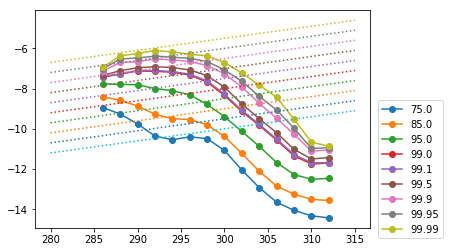

In [76]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-28,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.06*np.array([280,315]),':')


In [ ]:
week2 = ds_allpr.sel(L=slice(8.5,14.5))
week2 = week2.stack(MSll=('M','S','lat','lon','L')).compute()
week2

In [ ]:
week2.coords['MSll'] = np.arange(0,4191264) 

In [ ]:
# plt.hist(week2.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tasb"] = to_bin(week2.tas)
# 

# plt.hist(week2.tasb.values.ravel(),bins=20)

In [ ]:
grouped2 = week2[['pr','tasb']].groupby('tasb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print iim,gp.pr.shape
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tasb=k)] = var

ds_group2


In [ ]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-28,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.06*np.array([280,315]),':')
    
plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T),'.-', color='grey')
plt.legend(ds_group2.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-28,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.06*np.array([280,315]),':')


In [ ]:
# week3 = ds_allpr.sel(L=slice(15.5,21.5))